In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('wine_dataset.csv')

In [3]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [15]:
data.shape

(6497, 13)

In [7]:
data_df = data[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']]
target = data['style']

In [41]:
sc = StandardScaler()
std_data = sc.fit_transform(data_df)

In [43]:
std_data.shape

(6497, 12)

In [55]:
pca = PCA(n_components=8)
principalcomponents = pca.fit_transform(std_data)
principalcomponents.shape

(6497, 8)

In [56]:
pca_df = pd.DataFrame(data=principalcomponents,columns=pca.get_feature_names_out())
pca_df.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515
1,-3.228595,1.197335,-1.998904,-0.377154,0.110313,1.945885,0.938413,0.425532
2,-3.237468,0.952580,-1.746578,-0.472791,0.225404,1.082561,0.451976,0.411350
3,-1.672561,1.600583,2.856552,-0.438364,0.213093,-0.970765,0.222429,-0.279690
4,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515


In [57]:
#each pc is a linear combination of 12 ind feaures
pca.components_.shape
#each principal component is constructed from 12 independent variables

(8, 12)

In [58]:
#variance explained by each pc
pca.explained_variance_

array([3.04201535, 2.65026192, 1.64175951, 1.06878976, 0.84062985,
       0.66050084, 0.56391324, 0.51606227])

In [59]:
#variance ratio explained by each pc
pca.explained_variance_ratio_

array([0.25346226, 0.22082117, 0.13679223, 0.0890521 , 0.07004171,
       0.05503326, 0.04698554, 0.04299857])

In [60]:
sum(pca.explained_variance_ratio_)

0.9151868442702052

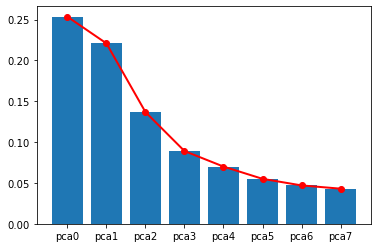

In [61]:
plt.bar(pca.get_feature_names_out(),pca.explained_variance_ratio_,)
plt.plot(pca.get_feature_names_out(), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.show()

In [ ]:
# PCA uses SVD to calculate the principal components
# we shall verify the same using the truncated SVD

In [143]:
#Importing required modules
import numpy as np
from sklearn.decomposition import TruncatedSVD

#Fitting the SVD class
trun_svd =  TruncatedSVD(n_components = 8)
data_transformed = trun_svd.fit_transform(std_data)

#Printing the transformed matrix
print("Transformed Matrix:")
print(data_transformed.shape)

Transformed Matrix:
(6497, 8)


In [144]:
svd_df = pd.DataFrame(data=data_transformed,columns=trun_svd.get_feature_names_out())
svd_df.head()

,truncatedsvd0,truncatedsvd1,truncatedsvd2,truncatedsvd3,truncatedsvd4,truncatedsvd5,truncatedsvd6,truncatedsvd7
0,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515
1,-3.228595,1.197335,-1.998904,-0.377154,0.110313,1.945885,0.938413,0.425532
2,-3.237468,0.952580,-1.746578,-0.472791,0.225404,1.082561,0.451976,0.411350
3,-1.672561,1.600583,2.856552,-0.438364,0.213093,-0.970765,0.222429,-0.279690
4,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515


In [140]:
pca_df.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515
1,-3.228595,1.197335,-1.998904,-0.377154,0.110313,1.945885,0.938413,0.425532
2,-3.237468,0.952580,-1.746578,-0.472791,0.225404,1.082561,0.451976,0.411350
3,-1.672561,1.600583,2.856552,-0.438364,0.213093,-0.970765,0.222429,-0.279690
4,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515


## Inference we can see that the principal components and SVD components are exactly the same

In [68]:
sum(trun_svd.explained_variance_ratio_)

0.9151868442702067

In [112]:
trun_svd.get_feature_names_out()

array(['truncatedsvd0', 'truncatedsvd1', 'truncatedsvd2', 'truncatedsvd3',
       'truncatedsvd4', 'truncatedsvd5', 'truncatedsvd6', 'truncatedsvd7'],
      dtype=object)

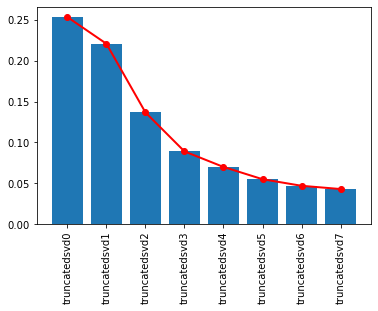

In [116]:
plt.bar(trun_svd.get_feature_names_out(),trun_svd.explained_variance_ratio_,)
plt.plot(trun_svd.get_feature_names_out(), trun_svd.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xticks(rotation=90)
plt.show()

### Lets calculate the PricipalComponents/ SVD components using Numpy Linear algebra

In [71]:
U,S,VT = np.linalg.svd(std_data)

In [127]:
S

array([140.57358116, 131.2101422 , 103.27085644,  83.32381582,
        73.89676261,  65.50277438,  60.52421365,  57.89939984,
        54.57146438,  44.07592111,  38.4530378 ,  14.59469805])

In [133]:
# create m x n Sigma matrix
Sigma = np.zeros((std_data.shape[0], std_data.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:std_data.shape[1], :std_data.shape[1]] = np.diag(S)
# select no of components
# select the columns in sigma
n_elements = 8
Sigma = Sigma[:, :n_elements]

# select the rows in VT
VT = VT[:n_elements, :]
# reconstruct
B = U.dot(Sigma.dot(VT))

# transform
T = U.dot(Sigma)

In [145]:
data_transformed_2 = pd.DataFrame(data=T)
data_transformed_2.head()

,0,1,2,3,4,5,6,7
0,-3.348438,0.568926,2.727386,0.223777,-0.621408,0.231602,-0.124851,0.000515
1,-3.228595,1.197335,1.998904,0.377154,-0.110313,-1.945885,-0.938413,-0.425532
2,-3.237468,0.952580,1.746578,0.472791,-0.225404,-1.082561,-0.451976,-0.411350
3,-1.672561,1.600583,-2.856552,0.438364,-0.213093,0.970765,-0.222429,0.279690
4,-3.348438,0.568926,2.727386,0.223777,-0.621408,0.231602,-0.124851,0.000515


In [141]:
pca_df.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515
1,-3.228595,1.197335,-1.998904,-0.377154,0.110313,1.945885,0.938413,0.425532
2,-3.237468,0.952580,-1.746578,-0.472791,0.225404,1.082561,0.451976,0.411350
3,-1.672561,1.600583,2.856552,-0.438364,0.213093,-0.970765,0.222429,-0.279690
4,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515


In [142]:
svd_df.head()

,truncatedsvd0,truncatedsvd1,truncatedsvd2,truncatedsvd3,truncatedsvd4,truncatedsvd5,truncatedsvd6,truncatedsvd7
0,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515
1,-3.228595,1.197335,-1.998904,-0.377154,0.110313,1.945885,0.938413,0.425532
2,-3.237468,0.952580,-1.746578,-0.472791,0.225404,1.082561,0.451976,0.411350
3,-1.672561,1.600583,2.856552,-0.438364,0.213093,-0.970765,0.222429,-0.279690
4,-3.348438,0.568926,-2.727386,-0.223777,0.621408,-0.231602,0.124851,-0.000515


### Inference:
> we can observe that the components calculated using all the approches are exactly the same

In [95]:
variance_ratios = S/sum(S)
sum(variance_ratios)

1.0

In [109]:
def no_components(variance_ratios,required_variance):
    explained_var=0
    for i in range(len(variance_ratios)):
        explained_var +=variance_ratios[i]
        
        if explained_var >required_variance:
            break
    #no of components required to achieved the specified variation
    no_of_comp = i+1
    return no_of_comp

In [110]:
no_components(variance_ratios,0.90)

10